## Exploring the algal mortality

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.colors as colors
from copy import copy

In [3]:
datadir = '/scratch/rfischer/Kooi_data/data_output/'

In [4]:
region = 'EqPac'
runtime = 80                  # [days]
dt = 60                       # [seconds]
outputdt = 3                 # [hours]
mixing = ['markov_0_KPP_reflect_tidal','markov_0_KPP_reflectNEMO_tidal','markov_0_KPP_reflectNEMO_detritus_tidal','markov_0_KPP_reflectsudden_tidal']
death = ['constant grazing','NEMO losses','NEMO_detritus', 'sudden death']
sizebinedges = [1e-3, 1e-4, 1e-5]
res = '1x1'
proc = 'bfnoadv'

In [5]:
ds_0 = xr.open_dataset(datadir+'regional_'+region+'_'+proc+'_Jan_2004_'+res+'res_'+mixing[0]+'mixing_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')
ds_1 = xr.open_dataset(datadir+'regional_'+region+'_'+proc+'_Jan_2004_'+res+'res_'+mixing[1]+'mixing_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')
ds_2 = xr.open_dataset(datadir+'regional_'+region+'_'+proc+'_Jan_2004_'+res+'res_'+mixing[2]+'mixing_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')
ds_3 = xr.open_dataset(datadir+'regional_'+region+'_'+proc+'_Jan_2004_'+res+'res_'+mixing[3]+'mixing_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')

In [6]:
dslist = [ds_0, ds_1, ds_2, ds_3]

In [7]:
split_ds_0 = list(ds_0.groupby_bins('r_pl', sizebinedges[::-1]))[::-1]
split_ds_1 = list(ds_1.groupby_bins('r_pl', sizebinedges[::-1]))[::-1]
split_ds_2 = list(ds_2.groupby_bins('r_pl', sizebinedges[::-1]))[::-1]
split_ds_3 = list(ds_3.groupby_bins('r_pl', sizebinedges[::-1]))[::-1]

#### Colormaps

In [8]:
# mort_cmap = copy(plt.get_cmap('RdPu'))
mort_cmap = ['#FF7917','#14FF37', '#732FFF']
mixing_cmap = ['firebrick','seagreen','purple']
w_vel_cmap = ['salmon', 'lime', 'cornflowerblue', 'gold']
r_pl_clist = ['#7a0177', '#fbb4b9'] #, '#c51b8a', '#f768a1','#feebe2'
r_pl_cmap = plt.get_cmap('RdPu_r')
region_cmap = ['teal', 'darkorange', '#9AE19D']

In [9]:
number_of_trajectories_to_plot = 225
n_plt = number_of_trajectories_to_plot
f_plt = int(np.round(len(ds_0['traj'])/n_plt))
print('plotting '+str(n_plt)+' of '+str(len(ds_0['traj']))+' trajectories')
print('plotting every '+str(f_plt)+' particles')

plotting 225 of 10000 trajectories
plotting every 44 particles


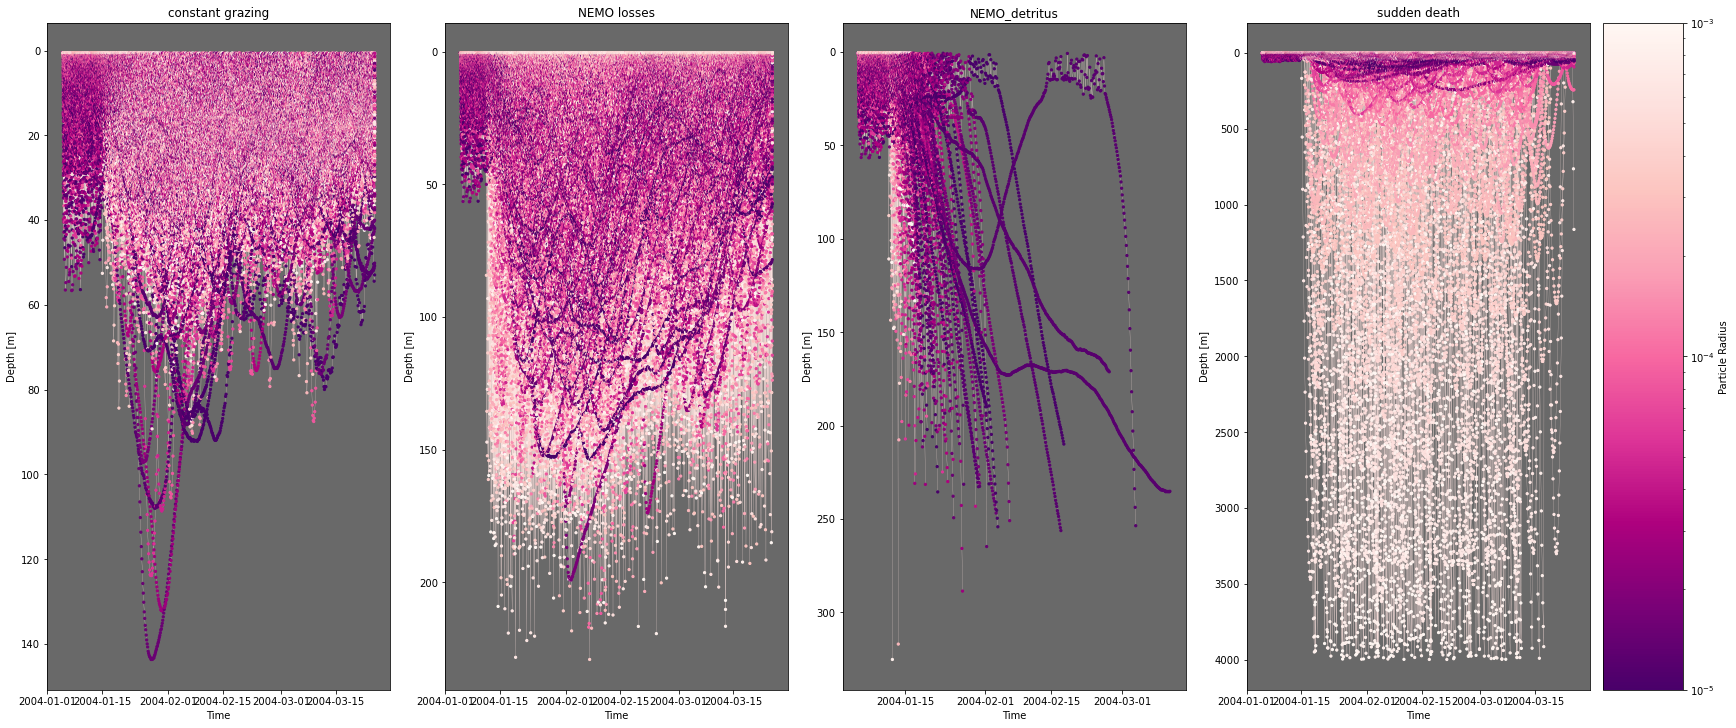

In [10]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(24,10), constrained_layout=True)


sc = ax1.scatter(ds_0['time'].T[:,::f_plt], ds_0['z'].T[:,::f_plt], s=5, c=np.tile(ds_0['r_pl'].T[::f_plt],[len(ds_0['obs']),1]),cmap=r_pl_cmap,norm=colors.LogNorm(vmin=ds_0['r_pl'].min(), vmax=ds_0['r_pl'].max()),zorder=2)
ln = ax1.plot(ds_0['time'].T[:,::f_plt], ds_0['z'].T[:,::f_plt], c='mistyrose',linewidth=0.2,zorder=1)
ax1.set_title(death[0])
ax1.set_ylabel('Depth [m]')
ax1.set_xlabel('Time')
ax1.set_facecolor('dimgray')
# ax1.set_ylim(150,0)
ax1.invert_yaxis()

sc = ax2.scatter(ds_1['time'].T[:,::f_plt], ds_1['z'].T[:,::f_plt], s=5, c=np.tile(ds_1['r_pl'].T[::f_plt],[len(ds_1['obs']),1]),cmap=r_pl_cmap,norm=colors.LogNorm(vmin=ds_1['r_pl'].min(), vmax=ds_1['r_pl'].max()),zorder=2)
ln = ax2.plot(ds_1['time'].T[:,::f_plt], ds_1['z'].T[:,::f_plt], c='mistyrose',linewidth=0.2,zorder=1)
ax2.set_title(death[1])
ax2.set_ylabel('Depth [m]')
ax2.set_xlabel('Time')
ax2.set_facecolor('dimgray')
# ax2.set_ylim(150,0)
ax2.invert_yaxis()

sc = ax3.scatter(ds_2['time'].T[:,::f_plt], ds_2['z'].T[:,::f_plt], s=5, c=np.tile(ds_2['r_pl'].T[::f_plt],[len(ds_2['obs']),1]),cmap=r_pl_cmap,norm=colors.LogNorm(vmin=ds_2['r_pl'].min(), vmax=ds_2['r_pl'].max()),zorder=2)
ln = ax3.plot(ds_2['time'].T[:,::f_plt], ds_2['z'].T[:,::f_plt], c='mistyrose',linewidth=0.2,zorder=1)
ax3.set_title(death[2])
ax3.set_ylabel('Depth [m]')
ax3.set_xlabel('Time')
ax3.set_facecolor('dimgray')
# ax3.set_ylim(150,0)
ax3.invert_yaxis()

sc = ax4.scatter(ds_3['time'].T[:,::f_plt], ds_3['z'].T[:,::f_plt], s=5, c=np.tile(ds_3['r_pl'].T[::f_plt],[len(ds_3['obs']),1]),cmap=r_pl_cmap,norm=colors.LogNorm(vmin=ds_3['r_pl'].min(), vmax=ds_3['r_pl'].max()),zorder=2)
ln = ax4.plot(ds_3['time'].T[:,::f_plt], ds_3['z'].T[:,::f_plt], c='mistyrose',linewidth=0.2,zorder=1)
ax4.set_title(death[3])
ax4.set_ylabel('Depth [m]')
ax4.set_xlabel('Time')
ax4.set_facecolor('dimgray')
# ax3.set_ylim(150,0)
ax4.invert_yaxis()

fig.colorbar(sc, ax=ax4, label='Particle Radius')
plt.show()

/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/core/computation.py:700: RuntimeWarning: divide by zero encountered in true_divide
  result_data = func(*input_data)
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/core/computation.py:700: RuntimeWarning: divide by zero encountered in true_divide
  result_data = func(*input_data)
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/core/computation.py:700: RuntimeWarning: divide by zero encountered in true_divide
  result_data = func(*input_data)
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/core/computation.py:700: RuntimeWarning: divide by zero encountered in true_divide
  result_data = func(*input_data)
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/core/computation.py:700: RuntimeWarning: divide by zero encountered in true_divide
  result_data = func(*input_data)
/nethome/6492215/.conda/envs/py3_pa

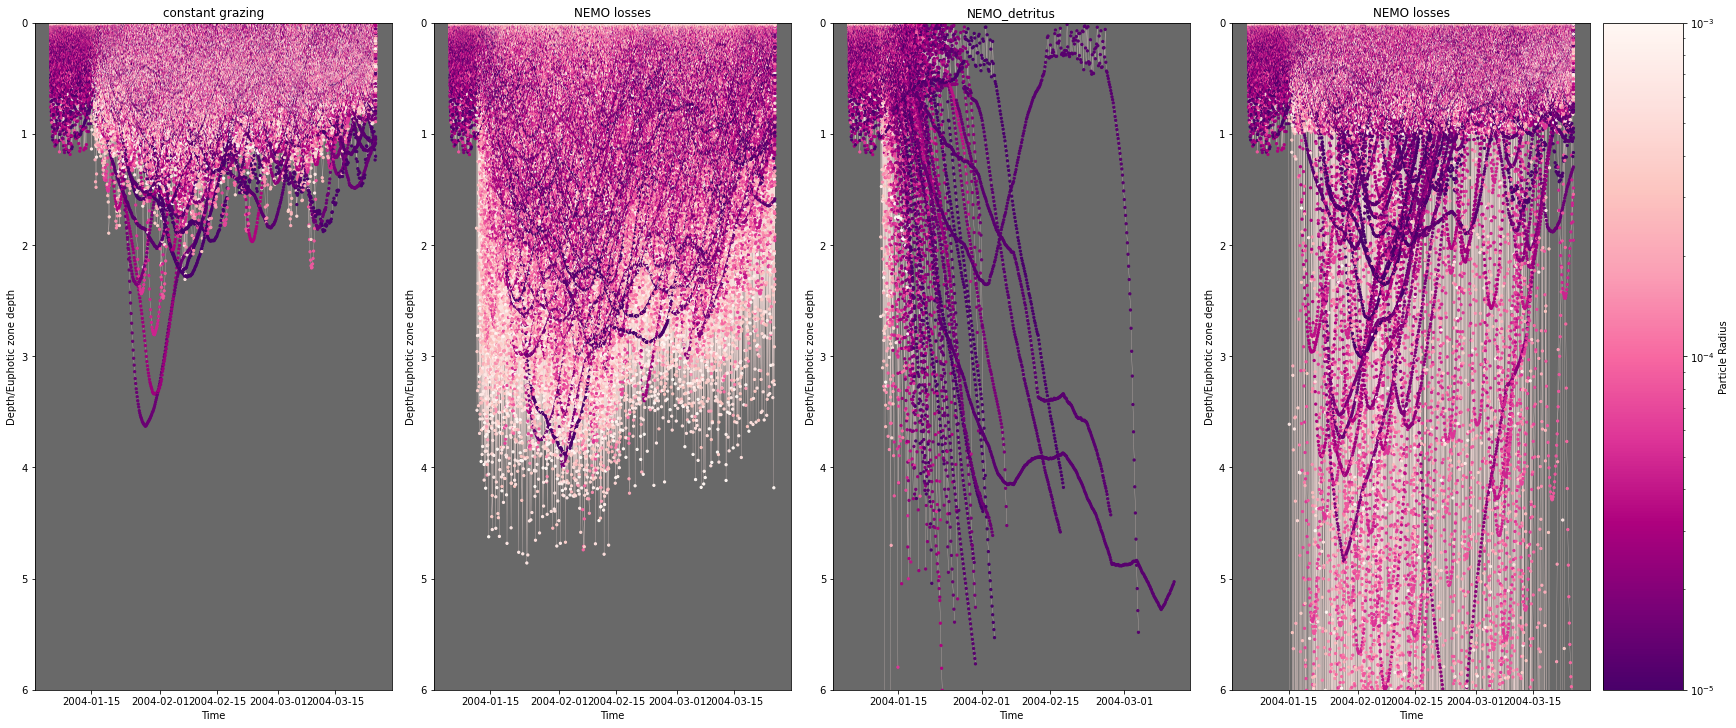

In [12]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(24,10), constrained_layout=True)


sc = ax1.scatter(ds_0['time'].T[:,::f_plt], np.divide(ds_0['z'].T[:,::f_plt],ds_0['euphz'].T[:,::f_plt]), s=5, c=np.tile(ds_0['r_pl'].T[::f_plt],[len(ds_0['obs']),1]),cmap=r_pl_cmap,norm=colors.LogNorm(vmin=ds_0['r_pl'].min(), vmax=ds_0['r_pl'].max()),zorder=2)
ln = ax1.plot(ds_0['time'].T[:,::f_plt], np.divide(ds_0['z'].T[:,::f_plt],ds_0['euphz'].T[:,::f_plt]), c='mistyrose',linewidth=0.2,zorder=1)
ax1.set_title(death[0])
ax1.set_ylabel('Depth/Euphotic zone depth')
ax1.set_xlabel('Time')
ax1.set_facecolor('dimgray')
ax1.set_ylim(6,0)
# ax1.invert_yaxis()

sc = ax2.scatter(ds_1['time'].T[:,::f_plt],  np.divide(ds_1['z'].T[:,::f_plt],ds_1['euphz'].T[:,::f_plt]), s=5, c=np.tile(ds_1['r_pl'].T[::f_plt],[len(ds_1['obs']),1]),cmap=r_pl_cmap,norm=colors.LogNorm(vmin=ds_1['r_pl'].min(), vmax=ds_1['r_pl'].max()),zorder=2)
ln = ax2.plot(ds_1['time'].T[:,::f_plt],  np.divide(ds_1['z'].T[:,::f_plt],ds_1['euphz'].T[:,::f_plt]), c='mistyrose',linewidth=0.2,zorder=1)
ax2.set_title(death[1])
ax2.set_ylabel('Depth/Euphotic zone depth')
ax2.set_xlabel('Time')
ax2.set_facecolor('dimgray')
ax2.set_ylim(6,0)
# ax2.invert_yaxis()

sc = ax3.scatter(ds_2['time'].T[:,::f_plt],  np.divide(ds_2['z'].T[:,::f_plt],ds_2['euphz'].T[:,::f_plt]), s=5, c=np.tile(ds_2['r_pl'].T[::f_plt],[len(ds_2['obs']),1]),cmap=r_pl_cmap,norm=colors.LogNorm(vmin=ds_2['r_pl'].min(), vmax=ds_2['r_pl'].max()),zorder=2)
ln = ax3.plot(ds_2['time'].T[:,::f_plt],  np.divide(ds_2['z'].T[:,::f_plt],ds_2['euphz'].T[:,::f_plt]), c='mistyrose',linewidth=0.2,zorder=1)
ax3.set_title(death[2])
ax3.set_ylabel('Depth/Euphotic zone depth')
ax3.set_xlabel('Time')
ax3.set_facecolor('dimgray')
ax3.set_ylim(6,0)

sc = ax4.scatter(ds_3['time'].T[:,::f_plt],  np.divide(ds_3['z'].T[:,::f_plt],ds_3['euphz'].T[:,::f_plt]), s=5, c=np.tile(ds_3['r_pl'].T[::f_plt],[len(ds_3['obs']),1]),cmap=r_pl_cmap,norm=colors.LogNorm(vmin=ds_1['r_pl'].min(), vmax=ds_1['r_pl'].max()),zorder=2)
ln = ax4.plot(ds_3['time'].T[:,::f_plt],  np.divide(ds_3['z'].T[:,::f_plt],ds_3['euphz'].T[:,::f_plt]), c='mistyrose',linewidth=0.2,zorder=1)
ax4.set_title(death[1])
ax4.set_ylabel('Depth/Euphotic zone depth')
ax4.set_xlabel('Time')
ax4.set_facecolor('dimgray')
ax4.set_ylim(6,0)

fig.colorbar(sc, ax=ax4, label='Particle Radius')
plt.show()

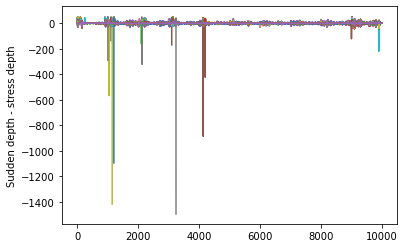

In [25]:
plt.plot(ds_1['z']-ds_0['z'])
plt.ylabel('Sudden depth - stress depth')
plt.show()

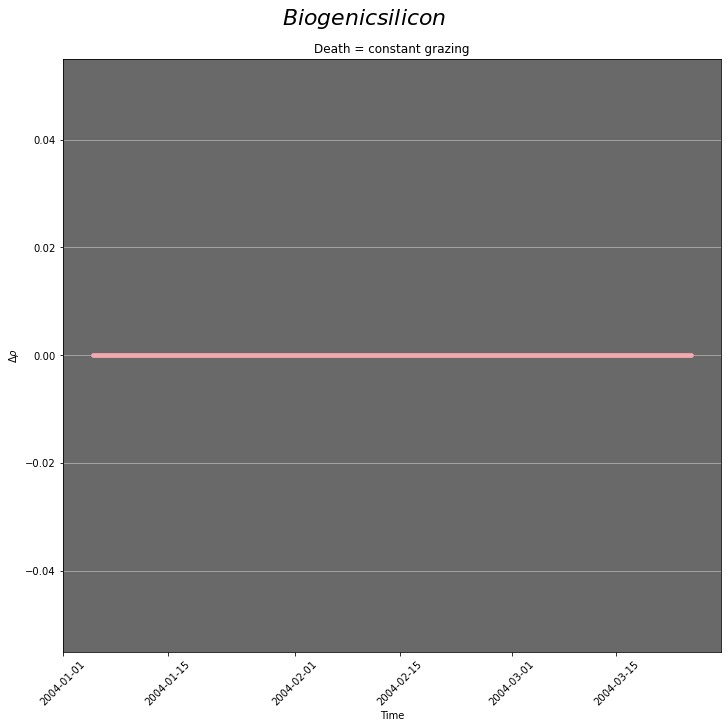

In [16]:
fig, ax1 = plt.subplots(1,1,figsize=(10,10), constrained_layout=True)
fig.suptitle('Biogenic silicon', fontsize=22)

for i, r in enumerate(split_ds_1):
    ax1.plot(r[1]['time'].T[:,::f_plt], r[1]['d_si'].T[:,::f_plt], marker='o', markersize=3,c=r_pl_clist[i], alpha = 0.1)
ax1.set_facecolor('dimgray')
ax1.grid(b=True, axis='y')
ax1.set_title('Death = '+death[1])
ax1.set_ylabel('$\\Delta \\rho$')
ax1.set_xlabel('Time')
ax1.tick_params(axis='x', rotation=45)
# ax1.set_ylim(-0.5,0.5)

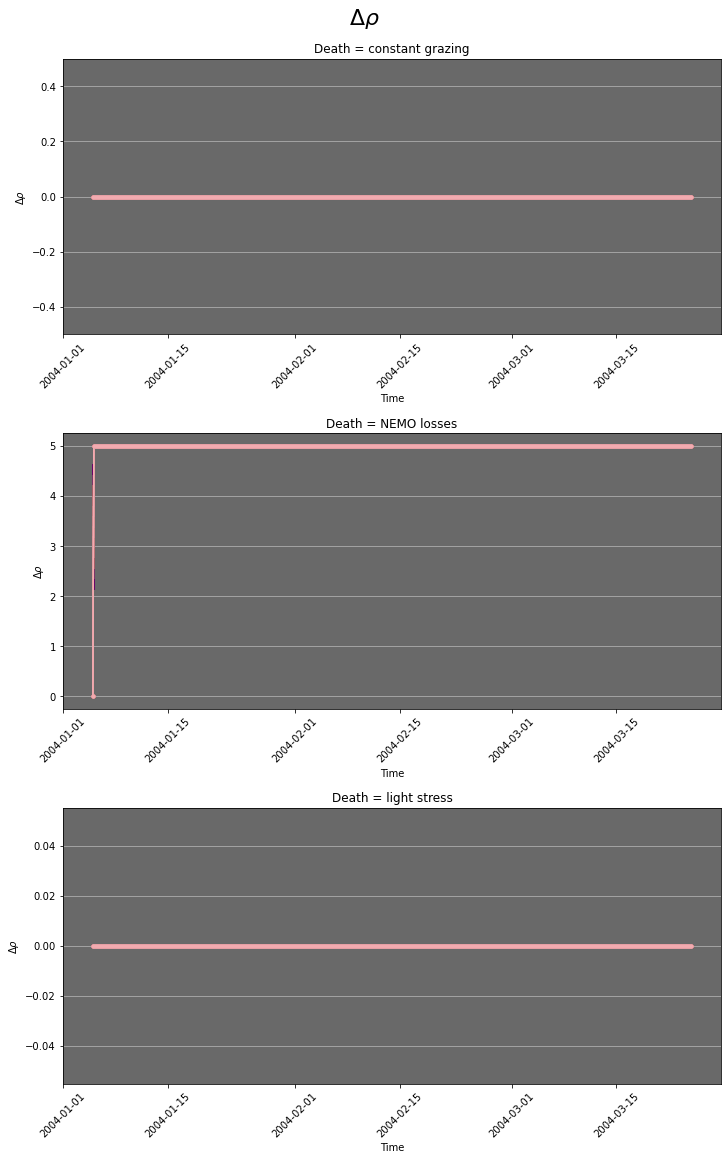

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(10,16), constrained_layout=True)
fig.suptitle('$\\Delta \\rho$', fontsize=22)

for i, r in enumerate(split_ds_0):
    ax1.plot(r[1]['time'].T[:,::f_plt], r[1]['N_Si'].T[:,::f_plt], marker='o', markersize=3,c=r_pl_clist[i], alpha = 0.1)
ax1.set_facecolor('dimgray')
ax1.grid(b=True, axis='y')
ax1.set_title('Death = '+death[0])
ax1.set_ylabel('$\\Delta \\rho$')
ax1.set_xlabel('Time')
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylim(-0.5,0.5)

for i, r in enumerate(split_ds_1):
    ax2.plot(r[1]['time'].T[:,::f_plt], r[1]['N_Si'].T[:,::f_plt], marker='o', markersize=3, c=r_pl_clist[i], alpha = 0.1)
ax2.set_facecolor('dimgray')
ax2.grid(b=True, axis='y')
ax2.set_title('Death = '+death[1])
ax2.set_ylabel('$\\Delta \\rho$')
ax2.set_xlabel('Time')
ax2.tick_params(axis='x', rotation=45)
# ax2.set_ylim(-0.5,0.5)

for i, r in enumerate(split_ds_2):
    ax3.plot(r[1]['time'].T[:,::f_plt], r[1]['N_Si'].T[:,::f_plt], marker='o', markersize=3, c=r_pl_clist[i], alpha = 0.1)
ax3.set_facecolor('dimgray')
ax3.grid(b=True, axis='y')
ax3.set_title('Death = '+death[2])
ax3.set_ylabel('$\\Delta \\rho$')
ax3.set_xlabel('Time')
ax3.tick_params(axis='x', rotation=45)
# ax3.set_ylim(-0.5,0.5)

# custom_lines = [Line2D([0], [0], color=r_pl_cmap[0], lw=4),
#                 Line2D([0], [0], color=r_pl_cmap[1], lw=4),
#                 Line2D([0], [0], color=r_pl_cmap[2], lw=4),
#                 Line2D([0], [0], color=r_pl_cmap[3], lw=4)]

# ax3.legend(custom_lines, ["{left:.1e} - {right:.1e}".format(left=split_ds_1[0][0].left, right=split_ds_1[0][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[1][0].left, right=split_ds_1[1][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[2][0].left, right=split_ds_1[2][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[3][0].left, right=split_ds_1[3][0].right)], title='Plastic Radius', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

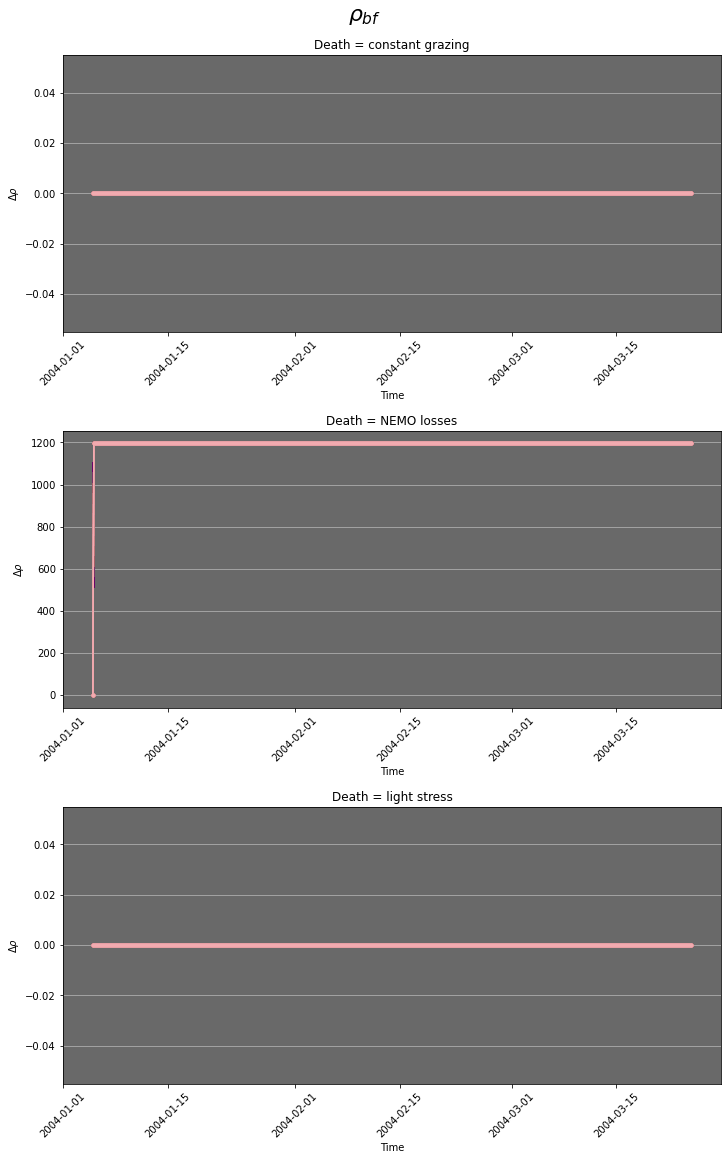

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(10,16), constrained_layout=True)
fig.suptitle('$\\rho_{bf}$', fontsize=22)

for i, r in enumerate(split_ds_0):
    ax1.plot(r[1]['time'].T[:,::f_plt], r[1]['rho_bf'].T[:,::f_plt], marker='o', markersize=3,c=r_pl_clist[i], alpha = 0.1)
ax1.set_facecolor('dimgray')
ax1.grid(b=True, axis='y')
ax1.set_title('Death = '+death[0])
ax1.set_ylabel('$\\Delta \\rho$')
ax1.set_xlabel('Time')
ax1.tick_params(axis='x', rotation=45)
# ax1.set_ylim(-0.5,0.5)

for i, r in enumerate(split_ds_1):
    ax2.plot(r[1]['time'].T[:,::f_plt], r[1]['rho_bf'].T[:,::f_plt], marker='o', markersize=3, c=r_pl_clist[i], alpha = 0.1)
ax2.set_facecolor('dimgray')
ax2.grid(b=True, axis='y')
ax2.set_title('Death = '+death[1])
ax2.set_ylabel('$\\Delta \\rho$')
ax2.set_xlabel('Time')
ax2.tick_params(axis='x', rotation=45)
# ax2.set_ylim(-0.5,0.5)

for i, r in enumerate(split_ds_2):
    ax3.plot(r[1]['time'].T[:,::f_plt], r[1]['rho_bf'].T[:,::f_plt], marker='o', markersize=3, c=r_pl_clist[i], alpha = 0.1)
ax3.set_facecolor('dimgray')
ax3.grid(b=True, axis='y')
ax3.set_title('Death = '+death[2])
ax3.set_ylabel('$\\Delta \\rho$')
ax3.set_xlabel('Time')
ax3.tick_params(axis='x', rotation=45)
# ax3.set_ylim(-0.5,0.5)

(-0.3, 0.1)

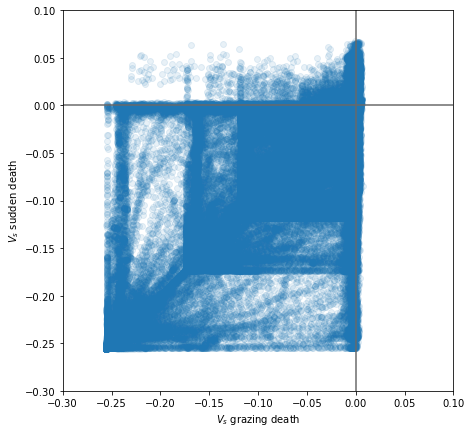

In [19]:
fig = plt.figure(figsize=(7,7))
ax = plt.axes()
ax.scatter(ds_0['vs_init'],ds_1['vs_init'], alpha=0.1)
ax.hlines(0.,-3e-1,1e-1, color='dimgray')
ax.vlines(0.,-3e-1,1e-1, color='dimgray')
ax.set_xlabel('$V_s$ '+death[0]+' death')
ax.set_ylabel('$V_s$ '+death[1]+' death')
ax.set_xlim(-3e-1,1e-1)
ax.set_ylim(-3e-1,1e-1)

In [37]:
vsratio = ds_1['vs_init']/ds_0['vs_init']

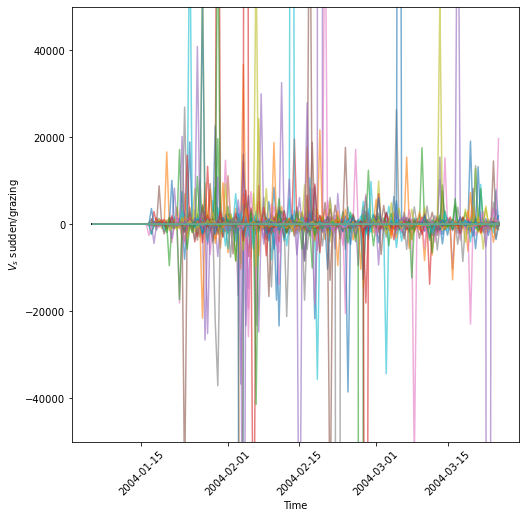

In [44]:
fig=plt.figure(figsize=(8,8))
ax=plt.axes()
ax.plot(ds_0['time'].T,vsratio.T, alpha=0.6)
ax.set_ylabel('$V_s$ sudden/grazing')
ax.set_ylim(-5e4,5e4)
ax.set_xlabel('Time')
ax.tick_params(axis='x', rotation=45)

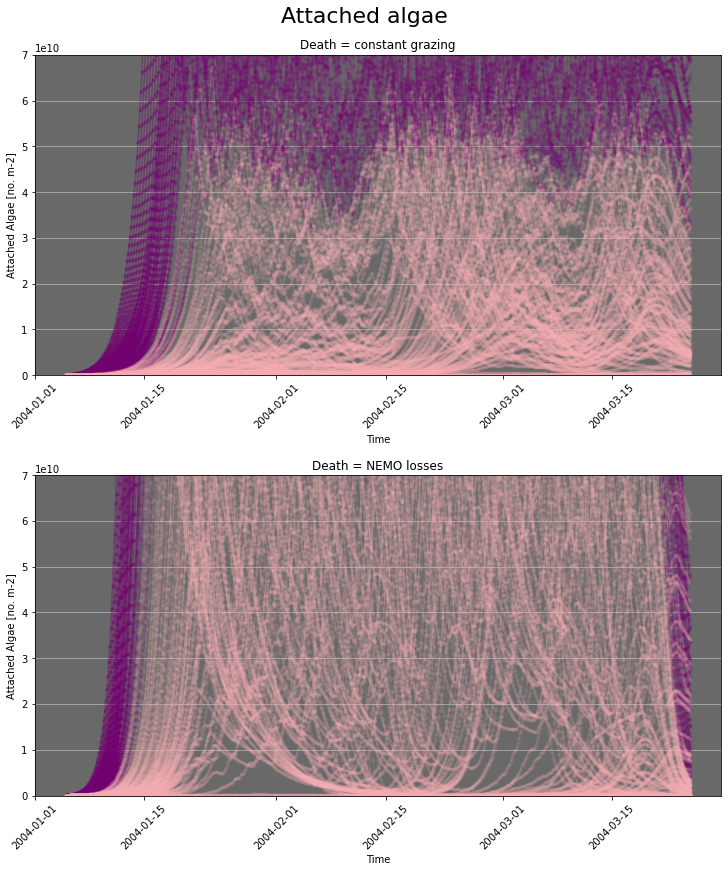

In [16]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(10,12), constrained_layout=True)
fig.suptitle('Attached algae', fontsize=22)

for i, r in enumerate(split_ds_0):
    ax1.plot(r[1]['time'].T[:,:100], r[1]['a'].T[:,:100], marker='o', markersize=3,c=r_pl_clist[i], alpha=0.1)
ax1.set_facecolor('dimgray')
ax1.grid(b=True, axis='y')
ax1.set_title('Death = '+death[0])
ax1.set_ylabel('Attached Algae [no. m-2]')
ax1.set_xlabel('Time')
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylim(-1e3,7e10)

for i, r in enumerate(split_ds_1):
    ax2.plot(r[1]['time'].T[:,:100], r[1]['a'].T[:,:100], marker='o', markersize=3, c=r_pl_clist[i], alpha=0.1)
ax2.set_facecolor('dimgray')
ax2.grid(b=True, axis='y')
ax2.set_title('Death = '+death[1])
ax2.set_ylabel('Attached Algae [no. m-2]')
ax2.set_xlabel('Time')
ax2.tick_params(axis='x', rotation=45)
ax2.set_ylim(-1e3,7e10)

# for i, r in enumerate(split_ds_2):
#     ax3.plot(r[1]['time'].T[:,:100], r[1]['a'].T[:,:100], marker='o', markersize=1,c=r_pl_cmap[i], alpha=1)
# ax3.set_facecolor('lightgray')
# ax3.grid(b=True, axis='y')
# ax3.set_title('Mortality rate = '+str(mortality[2]) + ' $d^{-1}$')
# ax3.set_ylabel('Attached Algae [no. m-2]')
# ax3.set_xlabel('Time')
# ax3.tick_params(axis='x', rotation=45)
# ax3.set_ylim(-1e3,6e7)

# custom_lines = [Line2D([0], [0], color=r_pl_cmap[0], lw=4),
#                 Line2D([0], [0], color=r_pl_cmap[1], lw=4),
#                 Line2D([0], [0], color=r_pl_cmap[2], lw=4),
#                 Line2D([0], [0], color=r_pl_cmap[3], lw=4)]

# ax3.legend(custom_lines, ["{left:.1e} - {right:.1e}".format(left=split_ds_1[0][0].left, right=split_ds_1[0][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[1][0].left, right=split_ds_1[1][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[2][0].left, right=split_ds_1[2][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[3][0].left, right=split_ds_1[3][0].right)], title='Plastic Radius', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

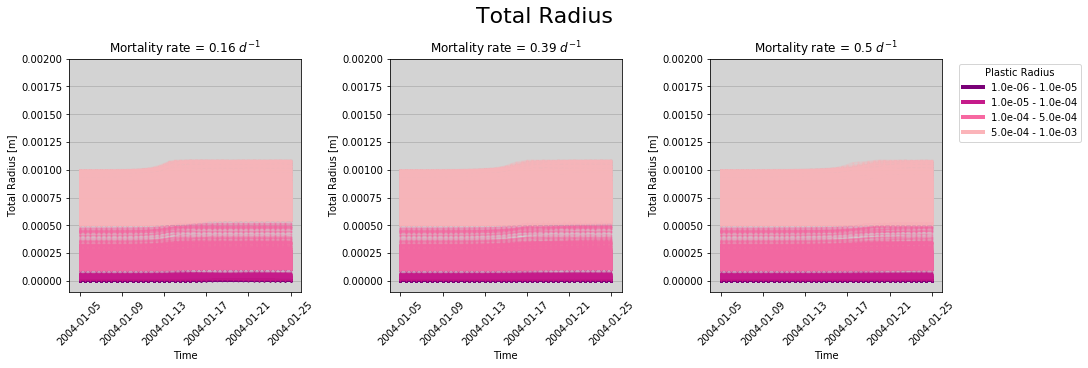

In [39]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5), constrained_layout=True)
fig.suptitle('Total Radius', fontsize=22)

for i, r in enumerate(split_ds_0):
    ax1.plot(r[1]['time'].T, r[1]['r_tot'].T, marker='o', markersize=1,c=r_pl_cmap[i], alpha=0.2)
ax1.set_facecolor('lightgray')
ax1.grid(b=True, axis='y')
ax1.set_title('Mortality rate = '+str(mortality[0]) + ' $d^{-1}$')
ax1.set_ylabel('Total Radius [m]')
ax1.set_xlabel('Time')
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylim(-1e-4,2e-3)

for i, r in enumerate(split_ds_1):
    ax2.plot(r[1]['time'].T, r[1]['r_tot'].T, marker='o', markersize=1, c=r_pl_cmap[i], alpha=0.2)
ax2.set_facecolor('lightgray')
ax2.grid(b=True, axis='y')
ax2.set_title('Mortality rate = '+str(mortality[1]) + ' $d^{-1}$')
ax2.set_ylabel('Total Radius [m]')
ax2.set_xlabel('Time')
ax2.tick_params(axis='x', rotation=45)
ax2.set_ylim(-1e-4,2e-3)

for i, r in enumerate(split_ds_2):
    ax3.plot(r[1]['time'].T, r[1]['r_tot'].T, marker='o', markersize=1,c=r_pl_cmap[i], alpha=0.2)
ax3.set_facecolor('lightgray')
ax3.grid(b=True, axis='y')
ax3.set_title('Mortality rate = '+str(mortality[2]) + ' $d^{-1}$')
ax3.set_ylabel('Total Radius [m]')
ax3.set_xlabel('Time')
ax3.tick_params(axis='x', rotation=45)
ax3.set_ylim(-1e-4,2e-3)

custom_lines = [Line2D([0], [0], color=r_pl_cmap[0], lw=4),
                Line2D([0], [0], color=r_pl_cmap[1], lw=4),
                Line2D([0], [0], color=r_pl_cmap[2], lw=4),
                Line2D([0], [0], color=r_pl_cmap[3], lw=4)]

ax3.legend(custom_lines, ["{left:.1e} - {right:.1e}".format(left=split_ds_1[0][0].left, right=split_ds_1[0][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[1][0].left, right=split_ds_1[1][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[2][0].left, right=split_ds_1[2][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[3][0].left, right=split_ds_1[3][0].right)], title='Plastic Radius', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

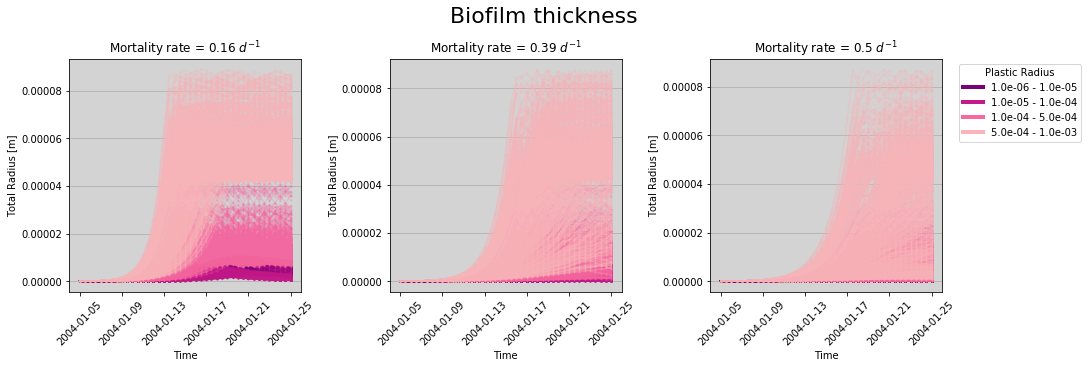

In [40]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5), constrained_layout=True)
fig.suptitle('Biofilm thickness', fontsize=22)

for i, r in enumerate(split_ds_0):
    ax1.plot(r[1]['time'].T[:,:n_plt], r[1]['r_tot'].T[:,:n_plt] - r[1]['r_pl'].T[:n_plt], marker='o', markersize=1,c=r_pl_cmap[i], alpha=0.2)
ax1.set_facecolor('lightgray')
ax1.grid(b=True, axis='y')
ax1.set_title('Mortality rate = '+str(mortality[0]) + ' $d^{-1}$')
ax1.set_ylabel('Total Radius [m]')
ax1.set_xlabel('Time')
ax1.tick_params(axis='x', rotation=45)
# ax1.set_ylim(-1e-3,1e-2)

for i, r in enumerate(split_ds_1):
    ax2.plot(r[1]['time'].T[:,:n_plt], r[1]['r_tot'].T[:,:n_plt] - r[1]['r_pl'].T[:n_plt], marker='o', markersize=1, c=r_pl_cmap[i], alpha=0.2)
ax2.set_facecolor('lightgray')
ax2.grid(b=True, axis='y')
ax2.set_title('Mortality rate = '+str(mortality[1]) + ' $d^{-1}$')
ax2.set_ylabel('Total Radius [m]')
ax2.set_xlabel('Time')
ax2.tick_params(axis='x', rotation=45)
# ax2.set_ylim(-1e-3,1e-2)

for i, r in enumerate(split_ds_2):
    ax3.plot(r[1]['time'].T[:,:n_plt], r[1]['r_tot'].T[:,:n_plt] - r[1]['r_pl'].T[:n_plt], marker='o', markersize=1,c=r_pl_cmap[i], alpha=0.2)
ax3.set_facecolor('lightgray')
ax3.grid(b=True, axis='y')
ax3.set_title('Mortality rate = '+str(mortality[2]) + ' $d^{-1}$')
ax3.set_ylabel('Total Radius [m]')
ax3.set_xlabel('Time')
ax3.tick_params(axis='x', rotation=45)
# ax3.set_ylim(-1e-4,1e-2)

custom_lines = [Line2D([0], [0], color=r_pl_cmap[0], lw=4),
                Line2D([0], [0], color=r_pl_cmap[1], lw=4),
                Line2D([0], [0], color=r_pl_cmap[2], lw=4),
                Line2D([0], [0], color=r_pl_cmap[3], lw=4)]

ax3.legend(custom_lines, ["{left:.1e} - {right:.1e}".format(left=split_ds_1[0][0].left, right=split_ds_1[0][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[1][0].left, right=split_ds_1[1][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[2][0].left, right=split_ds_1[2][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[3][0].left, right=split_ds_1[3][0].right)], title='Plastic Radius', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()